# Contents: This script includes-
### 1. Importing libraries and necessary files
### 2. Data Wrangling 
####    -  Dropping columns that are not needed for analysis
####    -  Dropping rows containing unneccesary information
####    -  Looking for missing values and handling it
####    - Cleaning up and sanitizing data 
####    -  Converting the data types
####    -  Transposing the data set 
### 3.  Plotting various plots
####     - Plotting the correlation matrix heat map
####    -  Plotting the scatter plots and pair plots 
####    -  Plotting the categorical plot

### Importing libraries and the customers data set

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Turning project folder path into a string
path=r'/Users/jasmeetakaur/Downloads/Jasmeeta/Data Immersion Course/Achievement 6'

In [3]:
# Importing the economic_profile.csv file
df_eco_profile=pd.read_csv(os.path.join(path,'profile_by_county_1969_2019.csv'),encoding = "ISO-8859-1", index_col = False)

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_13128/853022703.py:2: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eco_profile=pd.read_csv(os.path.join(path,'profile_by_county_1969_2019.csv'),encoding = "ISO-8859-1", index_col = False)


## Data Wrangling 

In [4]:
# Sanity testing the data frame contents
df_eco_profile.head(10)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAINC30,10.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,12541995000,13315478000,13998383000,14175503000,14982715000,15717140000,16151881000,16937582000,17839255000,18542262000
1,"""00000""",United States,,CAINC30,45.0,...,Net earnings by place of residence,Thousands of dollars,609767000,647228000,...,8044221000,8531667000,8956340000,9132669000,9539185000,9915088000,10145493000,10626821000,11167886000,11667012000
2,"""00000""",United States,,CAINC30,50.0,...,Personal current transfer receipts,Thousands of dollars,62322000,74733000,...,2325117000,2358654000,2362988000,2424297000,2541510000,2685370000,2776746000,2855049000,2970254000,3125174000
3,"""00000""",United States,,CAINC30,60.0,...,Income maintenance benefits 1/,Thousands of dollars,7275000,9897000,...,256034000,264137000,267614000,271171000,270971000,273685000,270259000,268468000,260380000,268682000
4,"""00000""",United States,,CAINC30,70.0,...,Unemployment insurance compensation,Thousands of dollars,2328000,4200000,...,139715000,107871000,84439000,63049000,35787000,32860000,32482000,30756000,28302000,28075000
5,"""00000""",United States,,CAINC30,80.0,...,Retirement and other,Thousands of dollars,52719000,60636000,...,1929368000,1986646000,2010935000,2090077000,2234752000,2378825000,2474005000,2555825000,2681572000,2828417000
6,"""00000""",United States,,CAINC30,90.0,...,"Dividends, interest, and rent 2/",Thousands of dollars,119140000,133564000,...,2172657000,2425157000,2679055000,2618537000,2902020000,3116682000,3229642000,3455712000,3701115000,3750076000
7,"""00000""",United States,,CAINC30,100.0,...,Population (persons) 3/,Number of persons,201298000,203798722,...,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
8,"""00000""",United States,,CAINC30,110.0,...,Per capita personal income 4/,Dollars,3931,4198,...,40547,42739,44605,44860,47071,49019,50015,52118,54606,56490
9,"""00000""",United States,,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,3029,3176,...,26006,27384,28539,28901,29969,30923,31416,32699,34185,35544


In [5]:
df_eco_profile.shape

(99142, 59)

In [6]:
df_eco_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99142 entries, 0 to 99141
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 99142 non-null  object 
 1   GeoName                 99138 non-null  object 
 2   Region                  99138 non-null  object 
 3   TableName               99138 non-null  object 
 4   LineCode                99138 non-null  float64
 5   IndustryClassification  99138 non-null  object 
 6   Description             99138 non-null  object 
 7   Unit                    99138 non-null  object 
 8   1969                    99138 non-null  object 
 9   1970                    99138 non-null  object 
 10  1971                    99138 non-null  object 
 11  1972                    99138 non-null  object 
 12  1973                    99138 non-null  object 
 13  1974                    99138 non-null  object 
 14  1975                    99138 non-null

### Step 1 - Dropping Columns 

#### Step 1.1 - Dropping unnecessary columns 
#### Assumption: Focussing on the latest 10 years of data for analysis.

In [4]:
# Dropping columns from 1969 till 2009
df_eco_profile = df_eco_profile.drop(df_eco_profile.columns[8:58], axis=1)

#### 1.2 Verifying number of columns after deleting the extra years

In [8]:
df_eco_profile.head(10)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2019
0,"""00000""",United States,,CAINC30,10.0,...,Personal income (thousands of dollars),Thousands of dollars,18542262000
1,"""00000""",United States,,CAINC30,45.0,...,Net earnings by place of residence,Thousands of dollars,11667012000
2,"""00000""",United States,,CAINC30,50.0,...,Personal current transfer receipts,Thousands of dollars,3125174000
3,"""00000""",United States,,CAINC30,60.0,...,Income maintenance benefits 1/,Thousands of dollars,268682000
4,"""00000""",United States,,CAINC30,70.0,...,Unemployment insurance compensation,Thousands of dollars,28075000
5,"""00000""",United States,,CAINC30,80.0,...,Retirement and other,Thousands of dollars,2828417000
6,"""00000""",United States,,CAINC30,90.0,...,"Dividends, interest, and rent 2/",Thousands of dollars,3750076000
7,"""00000""",United States,,CAINC30,100.0,...,Population (persons) 3/,Number of persons,328239523
8,"""00000""",United States,,CAINC30,110.0,...,Per capita personal income 4/,Dollars,56490
9,"""00000""",United States,,CAINC30,120.0,...,Per capita net earnings 4/,Dollars,35544


#### 1.3 Dropping other unnecessary columns

In [5]:
# Dropping columns which are not informative
df_eco_profile = df_eco_profile.drop(columns = ['IndustryClassification', 'TableName', 'LineCode', 'Region', 'Unit'])

In [10]:
df_eco_profile.head(10)

,GeoFIPS,GeoName,Description,2019
0,"""00000""",United States,Personal income (thousands of dollars),18542262000
1,"""00000""",United States,Net earnings by place of residence,11667012000
2,"""00000""",United States,Personal current transfer receipts,3125174000
3,"""00000""",United States,Income maintenance benefits 1/,268682000
4,"""00000""",United States,Unemployment insurance compensation,28075000
5,"""00000""",United States,Retirement and other,2828417000
6,"""00000""",United States,"Dividends, interest, and rent 2/",3750076000
7,"""00000""",United States,Population (persons) 3/,328239523
8,"""00000""",United States,Per capita personal income 4/,56490
9,"""00000""",United States,Per capita net earnings 4/,35544


### Step 2 - Dropping unnecessary rows that contain information about USA and the states
#### Assumption: We only want to work with the county data

#### 2.1 Printing the count of rows containing "United States"

In [11]:
df_eco_profile["GeoName"].str.contains('United States').value_counts(dropna=False)

GeoName
False    99107
True        31
NaN          4
Name: count, dtype: int64

#### 2.2 Printing the total number of rows

In [12]:
df_eco_profile.shape

(99142, 4)

#### 2.3 Deleting the count of rows containing "United States"

In [6]:
df_eco_profile =  df_eco_profile[~df_eco_profile["GeoName"].str.contains('United States', na = False)]

#### 2.4 Verify the count of rows containing "United States"

In [7]:
 #df_eco_profile["GeoName"].str.contains('United States').value_counts()
(df_eco_profile['GeoName']=='United States').value_counts()

GeoName
False    99111
Name: count, dtype: int64

#### 2.5 Verify the total count of rows after deleting rows containing "United States"

In [15]:
df_eco_profile.shape

(99111, 4)

#### 2.6 Printing the count of rows containing the name of the states

In [8]:
(df_eco_profile['GeoName'].isin(["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"])).value_counts()

GeoName
False    97561
True      1550
Name: count, dtype: int64

#### 2.7 Printing the total number of rows

In [17]:
df_eco_profile.shape

(99111, 4)

#### 2.8 Deleting the count of rows containing only the states

In [9]:
df_eco_profile =  df_eco_profile[~df_eco_profile["GeoName"].isin(["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"])]

In [19]:
df_eco_profile.shape

(97561, 4)

#### 2.9 Verify the count of rows containing the name of the states¶

In [10]:
#df_eco_profile['GeoName'].str.contains('Alabama|Alaska|Arizona|Arkansas|California|Colorado|Connecticut|Delaware|Florida|Georgia|Hawaii|Idaho|Illinois|Indiana|Iowa|Kansas|Kentucky|Louisiana|Maine|Maryland|Massachusetts|Michigan|Minnesota|Mississippi|Missouri|Montana|Nebraska|Nevada|New Hampshire|New Jersey|New Mexico|New York|North Carolina|North Dakota|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode Island|South Carolina|South Dakota|Tennessee|Texas|Utah|Vermont|Virginia|Washington|West Virginia|Wisconsin|Wyoming').value_counts()
(df_eco_profile['GeoName'].isin(["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"])).value_counts()

GeoName
False    97561
Name: count, dtype: int64

### 2.8 Delelting the count of rows containing only the regions

In [11]:
(df_eco_profile["GeoName"].isin(["District of Columbia","New England","Mideast","Great Lakes","Plains","Southeast","Southwest", "Rocky Mountain","Far West"])).value_counts()

GeoName
False    97282
True       279
Name: count, dtype: int64

In [12]:
df_eco_profile =  df_eco_profile[~df_eco_profile["GeoName"].isin(["District of Columbia","New England","Mideast","Great Lakes","Plains","Southeast","Southwest", "Rocky Mountain","Far West"])]

#### 2.10 Verify the total number of rows

In [23]:
df_eco_profile.shape

(97282, 4)

In [24]:
df_eco_profile.head(10)

,GeoFIPS,GeoName,Description,2019
62,"""01001""","Autauga, AL",Personal income (thousands of dollars),2453617
63,"""01001""","Autauga, AL",Net earnings by place of residence,1555278
64,"""01001""","Autauga, AL",Personal current transfer receipts,542039
65,"""01001""","Autauga, AL",Income maintenance benefits 1/,51336
66,"""01001""","Autauga, AL",Unemployment insurance compensation,1831
67,"""01001""","Autauga, AL",Retirement and other,488872
68,"""01001""","Autauga, AL","Dividends, interest, and rent 2/",356300
69,"""01001""","Autauga, AL",Population (persons) 3/,55869
70,"""01001""","Autauga, AL",Per capita personal income 4/,43917
71,"""01001""","Autauga, AL",Per capita net earnings 4/,27838


In [25]:
df_eco_profile.to_excel(os.path.join(path, 'exceltest.xlsx'))

In [13]:
df_eco_profile = df_eco_profile.drop(columns = ['GeoName'])

In [27]:
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617
63,"""01001""",Net earnings by place of residence,1555278
64,"""01001""",Personal current transfer receipts,542039
65,"""01001""",Income maintenance benefits 1/,51336
66,"""01001""",Unemployment insurance compensation,1831
67,"""01001""",Retirement and other,488872
68,"""01001""","Dividends, interest, and rent 2/",356300
69,"""01001""",Population (persons) 3/,55869
70,"""01001""",Per capita personal income 4/,43917
71,"""01001""",Per capita net earnings 4/,27838


In [28]:
df_eco_profile.tail(10)

,GeoFIPS,Description,2019
98884,"""56045""",Proprietors employment,1412.0
98885,"""56045""",Farm proprietors employment 6/,247.0
98886,"""56045""",Nonfarm proprietors employment,1165.0
98887,"""56045""",Average earnings per job (dollars),42309.0
98888,"""56045""",Average wages and salaries,43602.0
98889,"""56045""",Average nonfarm proprietors' income,16838.0
99138,Note: See the included footnote file.,NaN,NaN
99139,CAINC30: Economic Profile,NaN,NaN
99140,"Last updated: November 17, 2020-- new statisti...",NaN,NaN
99141,Source: U.S. Department of Commerce / Bureau o...,NaN,NaN


#### 2.11 Deleting the last 4 rows containing metadata

In [14]:
df_eco_profile.drop(df_eco_profile.tail(4).index, inplace=True)

In [30]:
# Verifying the rows at the end of the data
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617
63,"""01001""",Net earnings by place of residence,1555278
64,"""01001""",Personal current transfer receipts,542039
65,"""01001""",Income maintenance benefits 1/,51336
66,"""01001""",Unemployment insurance compensation,1831
67,"""01001""",Retirement and other,488872
68,"""01001""","Dividends, interest, and rent 2/",356300
69,"""01001""",Population (persons) 3/,55869
70,"""01001""",Per capita personal income 4/,43917
71,"""01001""",Per capita net earnings 4/,27838


In [31]:
df_eco_profile.shape

(97278, 3)

### Step 3- Looking for missing values

#### There were no missing values as such but on converting the year column values to float type it showed the presence of (NA) which could not be converted. So checking for the presence of (NA). 

In [15]:
# Checking for (NA) values
(df_eco_profile['2019']=='(NA)').value_counts()

2019
False    96503
True       775
Name: count, dtype: int64

In [33]:
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617
63,"""01001""",Net earnings by place of residence,1555278
64,"""01001""",Personal current transfer receipts,542039
65,"""01001""",Income maintenance benefits 1/,51336
66,"""01001""",Unemployment insurance compensation,1831
67,"""01001""",Retirement and other,488872
68,"""01001""","Dividends, interest, and rent 2/",356300
69,"""01001""",Population (persons) 3/,55869
70,"""01001""",Per capita personal income 4/,43917
71,"""01001""",Per capita net earnings 4/,27838


In [16]:
# Replacing all '(NA)' with 0
df_eco_profile.replace('(NA)',0, inplace=True,regex=True)

In [35]:
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617
63,"""01001""",Net earnings by place of residence,1555278
64,"""01001""",Personal current transfer receipts,542039
65,"""01001""",Income maintenance benefits 1/,51336
66,"""01001""",Unemployment insurance compensation,1831
67,"""01001""",Retirement and other,488872
68,"""01001""","Dividends, interest, and rent 2/",356300
69,"""01001""",Population (persons) 3/,55869
70,"""01001""",Per capita personal income 4/,43917
71,"""01001""",Per capita net earnings 4/,27838


In [36]:
# Verifying for the changed data type 
df_eco_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97278 entries, 62 to 98889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GeoFIPS      97278 non-null  object
 1   Description  97278 non-null  object
 2   2019         97278 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [17]:
df_eco_profile['2019'] = df_eco_profile['2019'].astype(float)

In [38]:
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617.0
63,"""01001""",Net earnings by place of residence,1555278.0
64,"""01001""",Personal current transfer receipts,542039.0
65,"""01001""",Income maintenance benefits 1/,51336.0
66,"""01001""",Unemployment insurance compensation,1831.0
67,"""01001""",Retirement and other,488872.0
68,"""01001""","Dividends, interest, and rent 2/",356300.0
69,"""01001""",Population (persons) 3/,55869.0
70,"""01001""",Per capita personal income 4/,43917.0
71,"""01001""",Per capita net earnings 4/,27838.0


### 5.2 Objective: Checking for duplicate values

In [18]:
df_dups = df_eco_profile[df_eco_profile.duplicated()]
df_dups

,GeoFIPS,Description,2019


### Insight: There are no duplicate values.

In [40]:
df_eco_profile.head(10)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617.0
63,"""01001""",Net earnings by place of residence,1555278.0
64,"""01001""",Personal current transfer receipts,542039.0
65,"""01001""",Income maintenance benefits 1/,51336.0
66,"""01001""",Unemployment insurance compensation,1831.0
67,"""01001""",Retirement and other,488872.0
68,"""01001""","Dividends, interest, and rent 2/",356300.0
69,"""01001""",Population (persons) 3/,55869.0
70,"""01001""",Per capita personal income 4/,43917.0
71,"""01001""",Per capita net earnings 4/,27838.0


In [19]:
# Removing the preceding and trailing white spaces in the "Description" column
df_eco_profile['Description'] = df_eco_profile['Description'].str.strip()

In [42]:
df_eco_profile.head(32)

,GeoFIPS,Description,2019
62,"""01001""",Personal income (thousands of dollars),2453617.0
63,"""01001""",Net earnings by place of residence,1555278.0
64,"""01001""",Personal current transfer receipts,542039.0
65,"""01001""",Income maintenance benefits 1/,51336.0
66,"""01001""",Unemployment insurance compensation,1831.0
67,"""01001""",Retirement and other,488872.0
68,"""01001""","Dividends, interest, and rent 2/",356300.0
69,"""01001""",Population (persons) 3/,55869.0
70,"""01001""",Per capita personal income 4/,43917.0
71,"""01001""",Per capita net earnings 4/,27838.0


In [20]:
df_eco_profile['GeoFIPS'] = df_eco_profile['GeoFIPS'].str.replace('"','')

In [44]:
df_eco_profile.head(32)

,GeoFIPS,Description,2019
62,01001,Personal income (thousands of dollars),2453617.0
63,01001,Net earnings by place of residence,1555278.0
64,01001,Personal current transfer receipts,542039.0
65,01001,Income maintenance benefits 1/,51336.0
66,01001,Unemployment insurance compensation,1831.0
67,01001,Retirement and other,488872.0
68,01001,"Dividends, interest, and rent 2/",356300.0
69,01001,Population (persons) 3/,55869.0
70,01001,Per capita personal income 4/,43917.0
71,01001,Per capita net earnings 4/,27838.0


In [21]:
df_eco_profile['GeoFIPS'] = df_eco_profile['GeoFIPS'].astype(float)

In [22]:
# Pivot the DataFrame
df_eco_profile_transposed = df_eco_profile.pivot(index='GeoFIPS', columns='Description', values='2019').reset_index()

# Rename the columns
df_eco_profile_transposed.columns.name = None  # Remove the name of the columns index
df_eco_profile_transposed.columns = ['GeoFIPS', 'Average earnings per job (dollars)', 'Average nonfarm proprietors\' income' , 'Average wages and salaries', 'Dividends, interest, and rent', 'Earnings by place of work', 'Employer contributions for employee pension and insurance funds', 'Employer contributions for government social insurance', 'Farm proprietors employment', 'Farm proprietors\' income', 'Income maintenance benefits', 'Net earnings by place of residence', 'Nonfarm proprietors employment', 'Nonfarm proprietors\' income', 'Per capita dividends, interest, and rent', 'Per capita income maintenance benefits',   'Per capita net earnings',  'Per capita personal current transfer receipts', 'Per capita personal income', 'Per capita retirement and other',  'Per capita unemployment insurance compensation',  'Personal current transfer receipts', 'Personal income (thousands of dollars)', 'Population (persons)', 'Proprietors employment', 'Proprietors\' income',  'Retirement and other', 'Supplements to wages and salaries', 'Total employment (number of jobs)', 'Unemployment insurance compensation', 'Wage and salary employment', 'Wages and salaries']

In [47]:
df_eco_profile_transposed.head(10)

,GeoFIPS,Average earnings per job (dollars),Average nonfarm proprietors' income,Average wages and salaries,"Dividends, interest, and rent",Earnings by place of work,Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Farm proprietors employment,Farm proprietors' income,...,Personal income (thousands of dollars),Population (persons),Proprietors employment,Proprietors' income,Retirement and other,Supplements to wages and salaries,Total employment (number of jobs),Unemployment insurance compensation,Wage and salary employment,Wages and salaries
0,1001.0,39984.0,16755.0,40452.0,356300.0,739418.0,87974.0,36175.0,315.0,12239.0,...,2453617.0,55869.0,5898.0,105782.0,488872.0,124149.0,18493.0,1831.0,12595.0,509487.0
1,1003.0,38997.0,18986.0,38937.0,2112917.0,4661559.0,488333.0,237189.0,748.0,8618.0,...,10600260.0,223234.0,35724.0,672671.0,2147261.0,725522.0,119535.0,6582.0,83811.0,3263366.0
2,1005.0,40885.0,17758.0,37187.0,139098.0,477699.0,64227.0,25107.0,439.0,15878.0,...,882834.0,24686.0,2790.0,57628.0,263772.0,89334.0,11684.0,805.0,8894.0,330737.0
3,1007.0,43208.0,12699.0,43365.0,77788.0,298005.0,39868.0,15908.0,141.0,-238.0,...,710451.0,22394.0,1788.0,20677.0,196611.0,55776.0,6897.0,680.0,5109.0,221552.0
4,1009.0,35325.0,20205.0,35667.0,256832.0,564947.0,65618.0,26286.0,992.0,15313.0,...,2105550.0,57826.0,5992.0,116340.0,499490.0,91904.0,15993.0,1784.0,10001.0,356703.0
5,1011.0,37652.0,10835.0,34206.0,44596.0,161187.0,22294.0,8289.0,228.0,12392.0,...,293741.0,10101.0,1102.0,21862.0,85946.0,30583.0,4281.0,446.0,3179.0,108742.0
6,1013.0,38058.0,14793.0,35177.0,112506.0,371671.0,50716.0,20111.0,326.0,7747.0,...,729749.0,19448.0,2238.0,36032.0,204149.0,70827.0,9766.0,1064.0,7528.0,264812.0
7,1015.0,46237.0,17873.0,41091.0,775233.0,2734113.0,416693.0,146566.0,474.0,1923.0,...,4361788.0,113605.0,10871.0,187750.0,1144026.0,563259.0,59132.0,4149.0,48261.0,1983104.0
8,1017.0,37836.0,7325.0,38483.0,177059.0,482065.0,66417.0,25988.0,238.0,7589.0,...,1193820.0,33254.0,3418.0,30884.0,352308.0,92405.0,12741.0,1148.0,9323.0,358776.0
9,1019.0,37111.0,18706.0,35084.0,146363.0,319678.0,40152.0,15018.0,442.0,17863.0,...,954378.0,26196.0,2888.0,63617.0,282531.0,55170.0,8614.0,850.0,5726.0,200891.0


In [23]:
df_eco_profile_transposed.to_excel(os.path.join(path, 'df_eco_profile1.xlsx'))

In [24]:
df_eco_profile_transposed.shape

(3138, 32)

In [25]:
df_eco_profile_transposed.corr()

,GeoFIPS,Average earnings per job (dollars),Average nonfarm proprietors' income,Average wages and salaries,"Dividends, interest, and rent",Earnings by place of work,Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Farm proprietors employment,Farm proprietors' income,...,Personal income (thousands of dollars),Population (persons),Proprietors employment,Proprietors' income,Retirement and other,Supplements to wages and salaries,Total employment (number of jobs),Unemployment insurance compensation,Wage and salary employment,Wages and salaries
GeoFIPS,1.000000,0.040235,0.091170,0.080776,-0.053703,-0.036006,-0.041171,-0.033406,0.126111,-0.136396,...,-0.045987,-0.047251,-0.045581,-0.024422,-0.051603,-0.038778,-0.040641,-0.039269,-0.038789,-0.037284
Average earnings per job (dollars),0.040235,1.000000,0.543170,0.852561,0.357653,0.389687,0.385421,0.392034,0.016046,0.179191,...,0.369934,0.321396,0.310366,0.362373,0.308849,0.388367,0.359142,0.318799,0.371760,0.390867
Average nonfarm proprietors' income,0.091170,0.543170,1.000000,0.323048,0.186528,0.219724,0.198664,0.208675,0.071302,0.077648,...,0.194292,0.151513,0.158589,0.273929,0.146515,0.202293,0.185756,0.169385,0.192890,0.210292
Average wages and salaries,0.080776,0.852561,0.323048,1.000000,0.436359,0.456680,0.448484,0.460704,0.064611,0.033109,...,0.445757,0.388575,0.382955,0.404928,0.370369,0.453359,0.426437,0.363048,0.436894,0.462239
"Dividends, interest, and rent",-0.053703,0.357653,0.186528,0.436359,1.000000,0.954942,0.950554,0.955356,0.082286,0.090404,...,0.974978,0.895605,0.935694,0.916048,0.891850,0.954141,0.946352,0.829442,0.942648,0.951922
Earnings by place of work,-0.036006,0.389687,0.219724,0.456680,0.954942,1.000000,0.983454,0.995257,0.076402,0.075940,...,0.961736,0.885653,0.916486,0.960356,0.868977,0.989351,0.960830,0.824219,0.967579,0.998605
Employer contributions for employee pension and insurance funds,-0.041171,0.385421,0.198664,0.448484,0.950554,0.983454,1.000000,0.990091,0.091787,0.096398,...,0.974963,0.932433,0.945382,0.932170,0.925104,0.998992,0.981155,0.878326,0.985065,0.979219
Employer contributions for government social insurance,-0.033406,0.392034,0.208675,0.460704,0.955356,0.995257,0.990091,1.000000,0.083062,0.077825,...,0.968714,0.907069,0.928635,0.942809,0.889811,0.995397,0.973843,0.842089,0.980766,0.994218
Farm proprietors employment,0.126111,0.016046,0.071302,0.064611,0.082286,0.076402,0.091787,0.083062,1.000000,0.245787,...,0.107051,0.152168,0.128526,0.083456,0.135902,0.089196,0.117786,0.139573,0.113542,0.071605
Farm proprietors' income,-0.136396,0.179191,0.077648,0.033109,0.090404,0.075940,0.096398,0.077825,0.245787,1.000000,...,0.098256,0.128159,0.091684,0.087901,0.121144,0.090669,0.097806,0.220864,0.098997,0.069809


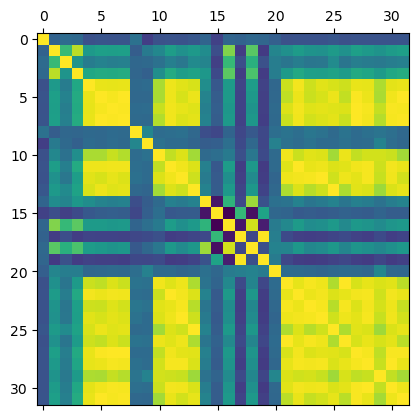

In [26]:
plt.matshow(df_eco_profile_transposed.corr())
plt.show()

In [27]:
# Dropping the columns which are not needed for answering the questions
df_eco_profile_transposed = df_eco_profile_transposed.drop(columns = ['Personal income (thousands of dollars)', 'Personal current transfer receipts', 'Income maintenance benefits', 'Unemployment insurance compensation', 'Retirement and other', 'Dividends, interest, and rent',  'Per capita net earnings', 'Per capita personal current transfer receipts', 'Per capita retirement and other', 'Per capita dividends, interest, and rent', 'Wages and salaries', 'Supplements to wages and salaries', 'Employer contributions for employee pension and insurance funds', 'Employer contributions for government social insurance', 'Proprietors\' income', 'Farm proprietors\' income',   'Nonfarm proprietors\' income', 'Wage and salary employment', 'Proprietors employment', 'Farm proprietors employment', 'Nonfarm proprietors employment', 'Average wages and salaries', 'Average nonfarm proprietors\' income'])


In [53]:
df_eco_profile_transposed.head(10)

,GeoFIPS,Average earnings per job (dollars),Earnings by place of work,Net earnings by place of residence,Per capita income maintenance benefits,Per capita personal income,Per capita unemployment insurance compensation,Population (persons),Total employment (number of jobs)
0,1001.0,39984.0,739418.0,1555278.0,919.0,43917.0,33.0,55869.0,18493.0
1,1003.0,38997.0,4661559.0,6178844.0,693.0,47485.0,29.0,223234.0,119535.0
2,1005.0,40885.0,477699.0,435544.0,1767.0,35763.0,33.0,24686.0,11684.0
3,1007.0,43208.0,298005.0,410984.0,1089.0,31725.0,30.0,22394.0,6897.0
4,1009.0,35325.0,564947.0,1299138.0,835.0,36412.0,31.0,57826.0,15993.0
5,1011.0,37652.0,161187.0,143535.0,1903.0,29080.0,44.0,10101.0,4281.0
6,1013.0,38058.0,371671.0,377539.0,1773.0,37523.0,55.0,19448.0,9766.0
7,1015.0,46237.0,2734113.0,2302411.0,1197.0,38394.0,37.0,113605.0,59132.0
8,1017.0,37836.0,482065.0,614017.0,1482.0,35900.0,35.0,33254.0,12741.0
9,1019.0,37111.0,319678.0,498090.0,1013.0,36432.0,32.0,26196.0,8614.0


In [28]:
df_eco_profile_transposed.to_excel(os.path.join(path, 'df_eco_profile_new.xlsx'))

In [30]:
df_eco_profile_transposed.corr()

,GeoFIPS,Average earnings per job (dollars),Earnings by place of work,Net earnings by place of residence,Per capita income maintenance benefits,Per capita personal income,Per capita unemployment insurance compensation,Population (persons),Total employment (number of jobs)
GeoFIPS,1.000000,0.040235,-0.036006,-0.040881,-0.125312,0.071874,0.025455,-0.047251,-0.040641
Average earnings per job (dollars),0.040235,1.000000,0.389687,0.380249,-0.063974,0.642724,0.239045,0.321396,0.359142
Earnings by place of work,-0.036006,0.389687,1.000000,0.961993,0.014368,0.345845,0.073853,0.885653,0.960830
Net earnings by place of residence,-0.040881,0.380249,0.961993,1.000000,-0.012227,0.346341,0.087120,0.955650,0.978530
Per capita income maintenance benefits,-0.125312,-0.063974,0.014368,-0.012227,1.000000,-0.341963,0.066750,0.016747,0.010330
Per capita personal income,0.071874,0.642724,0.345845,0.346341,-0.341963,1.000000,0.223098,0.247583,0.300391
Per capita unemployment insurance compensation,0.025455,0.239045,0.073853,0.087120,0.066750,0.223098,1.000000,0.076679,0.069400
Population (persons),-0.047251,0.321396,0.885653,0.955650,0.016747,0.247583,0.076679,1.000000,0.973350
Total employment (number of jobs),-0.040641,0.359142,0.960830,0.978530,0.010330,0.300391,0.069400,0.973350,1.000000


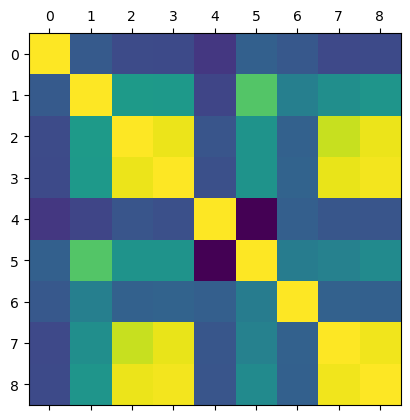

In [31]:
plt.matshow(df_eco_profile_transposed.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

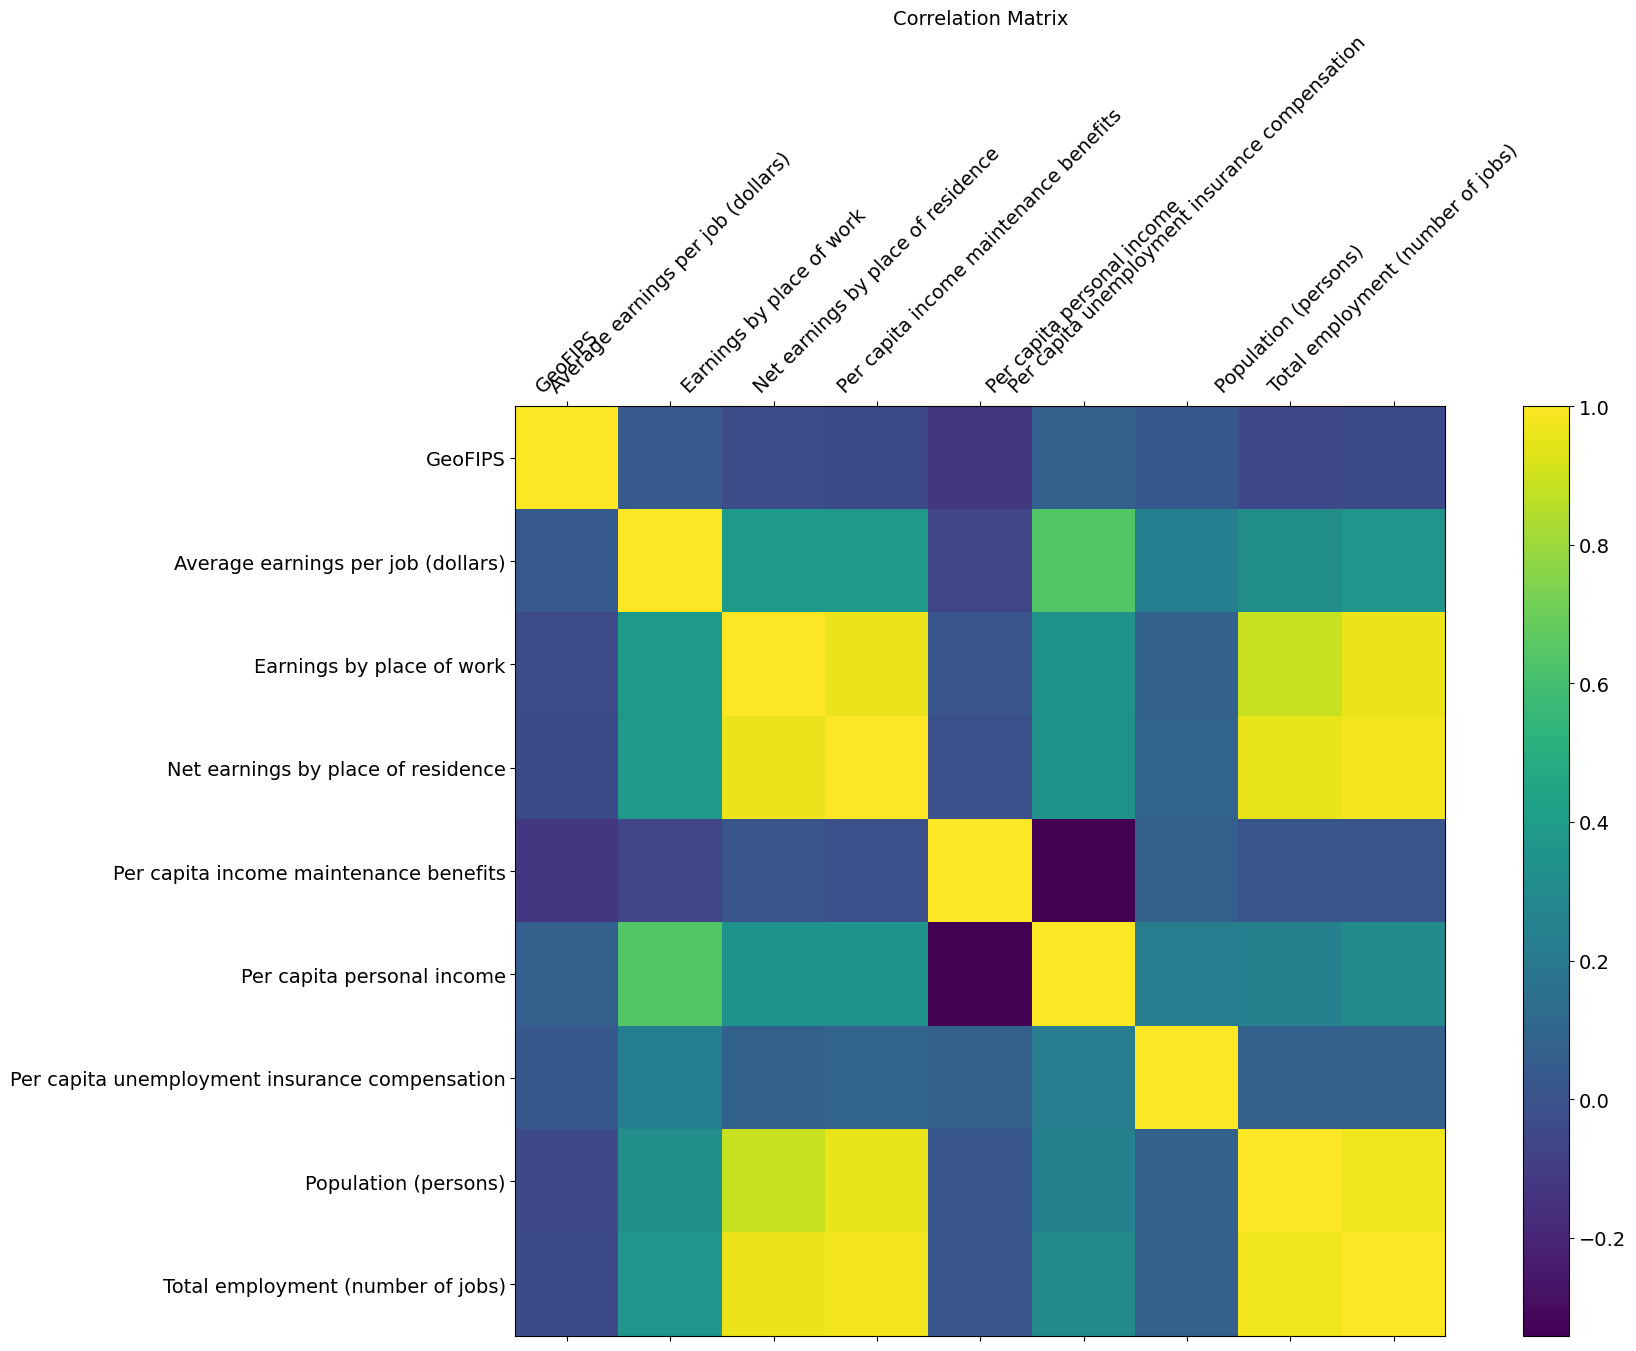

In [32]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(20, 12)) # figure size 
plt.matshow(df_eco_profile_transposed.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_eco_profile_transposed.shape[1]), df_eco_profile_transposed.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_eco_profile_transposed.shape[1]), df_eco_profile_transposed.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [33]:
df_eco_profile_transposed.columns

Index(['GeoFIPS', 'Average earnings per job (dollars)',
       'Earnings by place of work', 'Net earnings by place of residence',
       'Per capita income maintenance benefits', 'Per capita personal income',
       'Per capita unemployment insurance compensation',
       'Population (persons)', 'Total employment (number of jobs)'],
      dtype='object')

In [34]:
# Create a subset excluding the "GeoFIPS" columns

sub = df_eco_profile_transposed[['Net earnings by place of residence', 'Population (persons)', 'Per capita personal income', 'Per capita income maintenance benefits', 'Per capita unemployment insurance compensation', 'Earnings by place of work', 'Total employment (number of jobs)', 'Average earnings per job (dollars)']]
                               

In [60]:
sub.shape

(3138, 8)

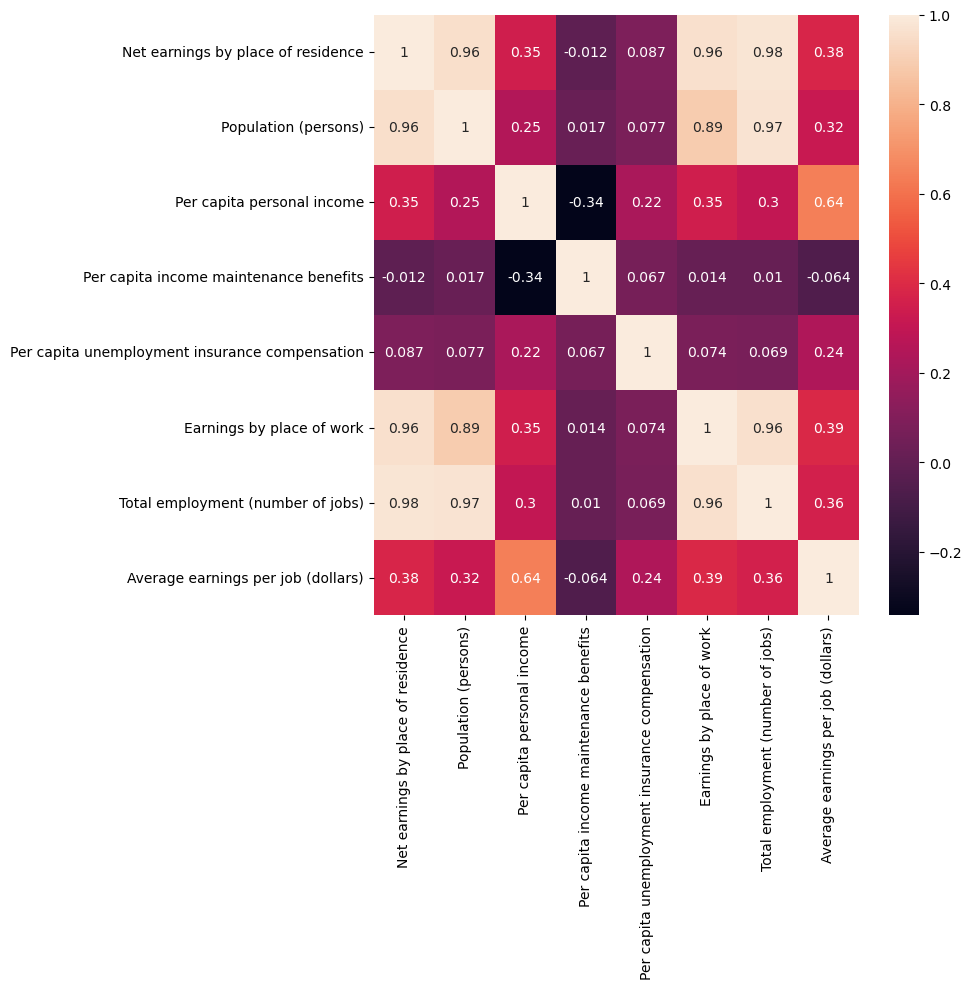

In [39]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.tight_layout()

In [36]:
sub.to_excel(os.path.join(path, 'df_sub123.xlsx'))

In [40]:
# Exporting the line chart as an object 
# line_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_plot.png'))
corr.get_figure().savefig('heatmap.png')

### Interpretation of the Scatterplot
1. **Analysis** - **Per capita personal income** has a moderate **negative relationship** with **per capita income maintainence benefits**. \
**Interpretation** - This suggests that counties with lower per capita personal income end up paying higher unemployment benefits. 
2. **Analysis** - **Population** has a strong correlation  with **Total employment**. \
**Interpretation** - Counties with higher population offer more employment opportunities. 
3.  **Analysis** - **Net earnings by place of residence** has a strong positive relation with **Population** \
**Interpretation** - People living in counties with higher population end up with higher earnings by place of residence. 
4.  **Analysis** - There is a strong relation between **Net earnings by place of residence** and **Earnings by place of work** with **Total employment**. \
**Interpretation** - People living in states that offer greater employment opportunities have higher earnings by place of residence and higher earnings by plce of work.
5.  **Analysis** - **Average earnigs per job** has a moderate relation with **Per capita personal income** \
**Interpretation** - People in counties with higher earnings per job have higher personal income.


# Scatterplots 

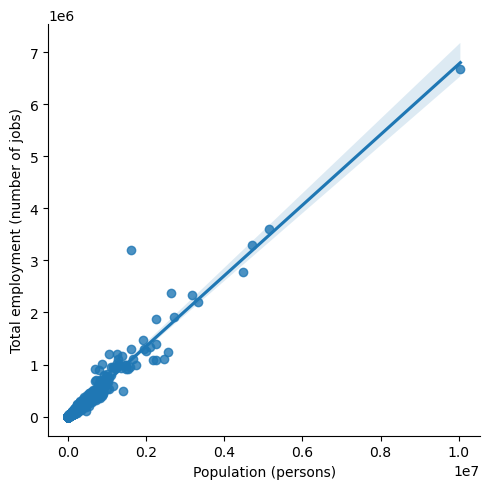

In [63]:
# Scatterplot for the "Population (persons)" and "Total employment (number of jobs)" columns in seaborn

sns.lmplot(x = 'Population (persons)', y = 'Total employment (number of jobs)', data = sub)

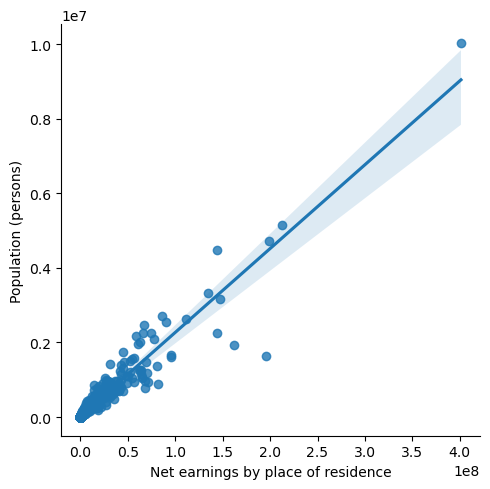

In [64]:
# Scatterplot for the "Net earnings by place of residence" and "Population (persons)" columns in seaborn

sns.lmplot(x = 'Net earnings by place of residence', y = 'Population (persons)', data = sub)

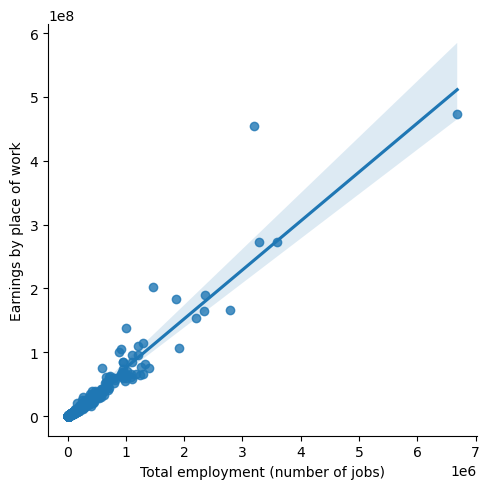

In [65]:
# Create a scatterplot for the "Total employment" and "Earnings by place of work" columns in seaborn

sns.lmplot(x = 'Total employment (number of jobs)', y = 'Earnings by place of work', data = sub)

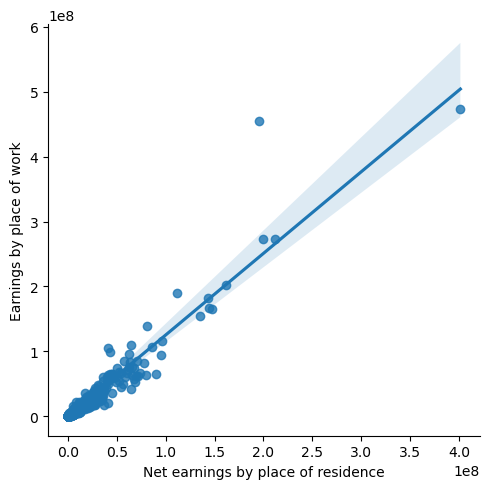

In [66]:
# Create a scatterplot for the "Net earnings by place of residence" and "Earnings by place of work" columns in seaborn

sns.lmplot(x = 'Net earnings by place of residence', y = 'Earnings by place of work', data = sub)

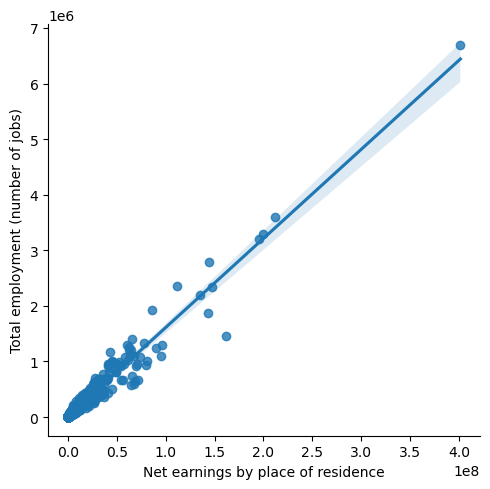

In [67]:
# Create a scatterplot for the "Total employment" and "Net earnings by place of residence" columns in seaborn

sns.lmplot(x = 'Net earnings by place of residence', y = 'Total employment (number of jobs)', data = sub)

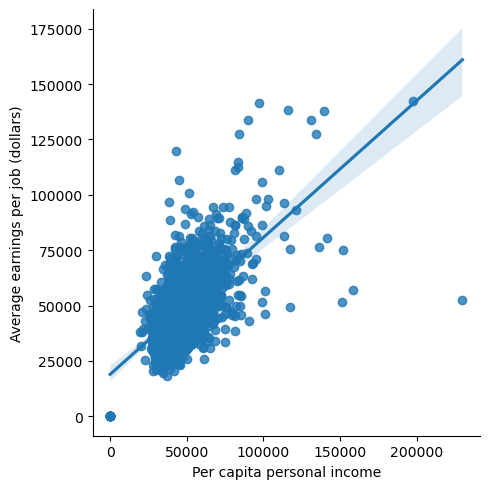

In [68]:
# Scatterplot for the "Average earnings per job (dollars)" and "Per capita personal income" columns in seaborn

sns.lmplot(x = 'Per capita personal income', y = 'Average earnings per job (dollars)', data = sub)

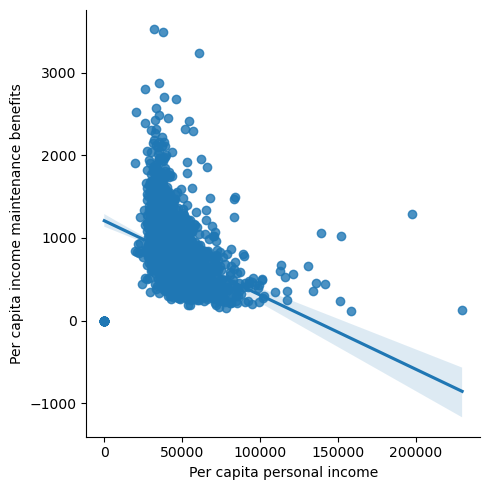

In [69]:
# # Scatterplot for the "Per capita income maintenance benefits" and "Per capita personal income" columns in seaborn
sns.lmplot(x = 'Per capita personal income', y = 'Per capita income maintenance benefits', data = sub)

# Interpretation of Scatterplots 
1. As was evident from the coefficients in the heat map strong linear correlation can be observed for Net earnings by place of residence with Earnings by place of work, Average earnings per job, Population and Total employment. 
2. There are a few outliers. The probable reason could be the exceptionally large size of certain counties in States like California.

# Pair Plots

In [42]:
# Create a subset excluding the "GeoFIPS" columns

df_sub = df_eco_profile_transposed[[ 'Net earnings by place of residence', 'Earnings by place of work','Average earnings per job (dollars)', 'Per capita personal income', 'Per capita income maintenance benefits', 'Population (persons)', 'Total employment (number of jobs)']]
                               

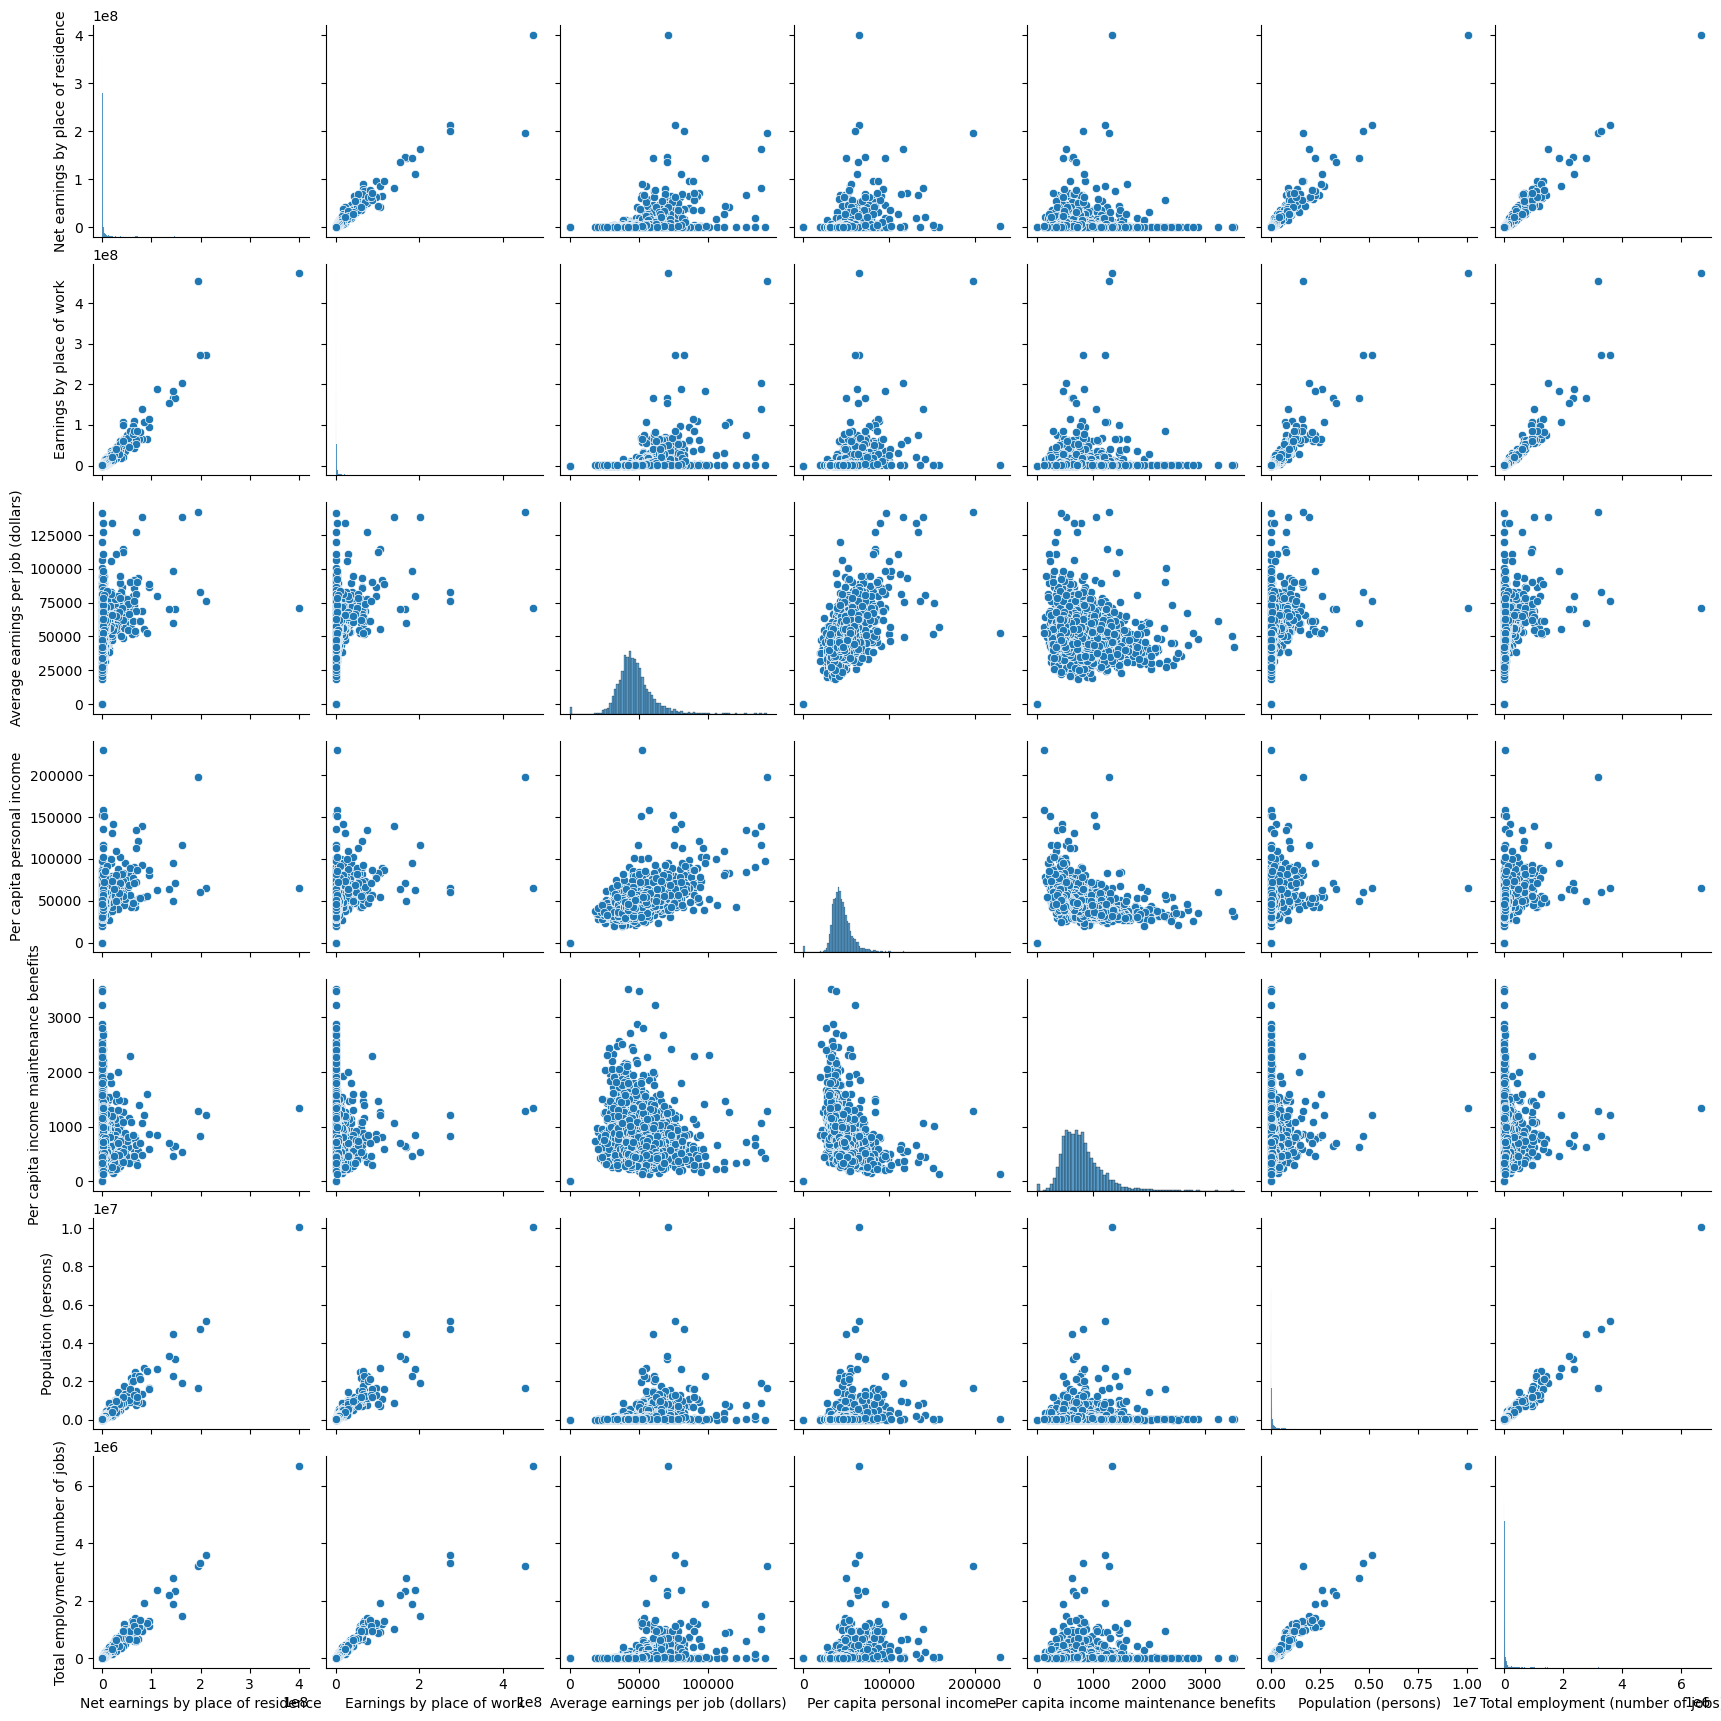

In [43]:
# Creating a pairplot
pair_plot = sns.pairplot(df_sub)

In [44]:
pair_plot.get_figure().savefig('pairplot.png')

AttributeError: 'PairGrid' object has no attribute 'get_figure'

### Interpretation of the Categorical plot between Per capita personal income and Average earnings per job 
1. The strong linear relation between Net earnings by residence with Earnings by place of work, Population and Total employment is very clear as expected from the previous graphs.
2. There is some relation between Per capita personal income and Average earnings per job as can be seen from the clustering of the points.

# Categorical Plots

<Axes: xlabel='Per capita personal income', ylabel='Count'>

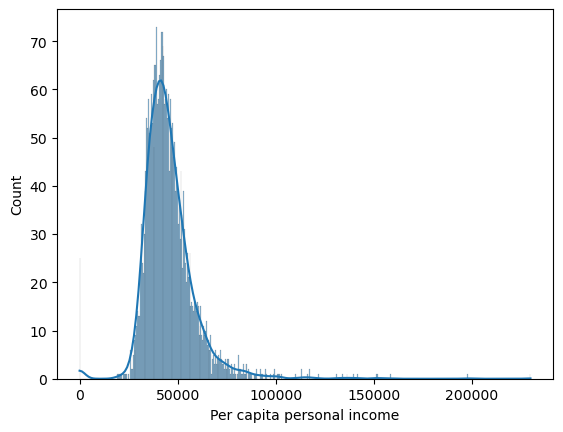

In [72]:
sns.histplot(df_sub['Per capita personal income'], bins = 500, kde = True)

In [73]:
df_sub.loc[df_sub['Per capita personal income'] < 40000, 'Income category'] = 'Low income'
df_sub.loc[(df_sub['Per capita personal income'] >= 40000) & (df_sub['Per capita personal income'] < 50000), 'Income category'] = 'Medium income'
df_sub.loc[df_sub['Per capita personal income'] >= 50000, 'Income category'] = 'High income'

/var/folders/77/3dq_7lv50b1b4jqj7g8kp0880000gn/T/ipykernel_96718/2313720444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['Per capita personal income'] < 40000, 'Income category'] = 'Low income'


In [74]:
df_sub['Income category'].value_counts(dropna = False)

Income category
Medium income    1219
Low income       1087
High income       832
Name: count, dtype: int64

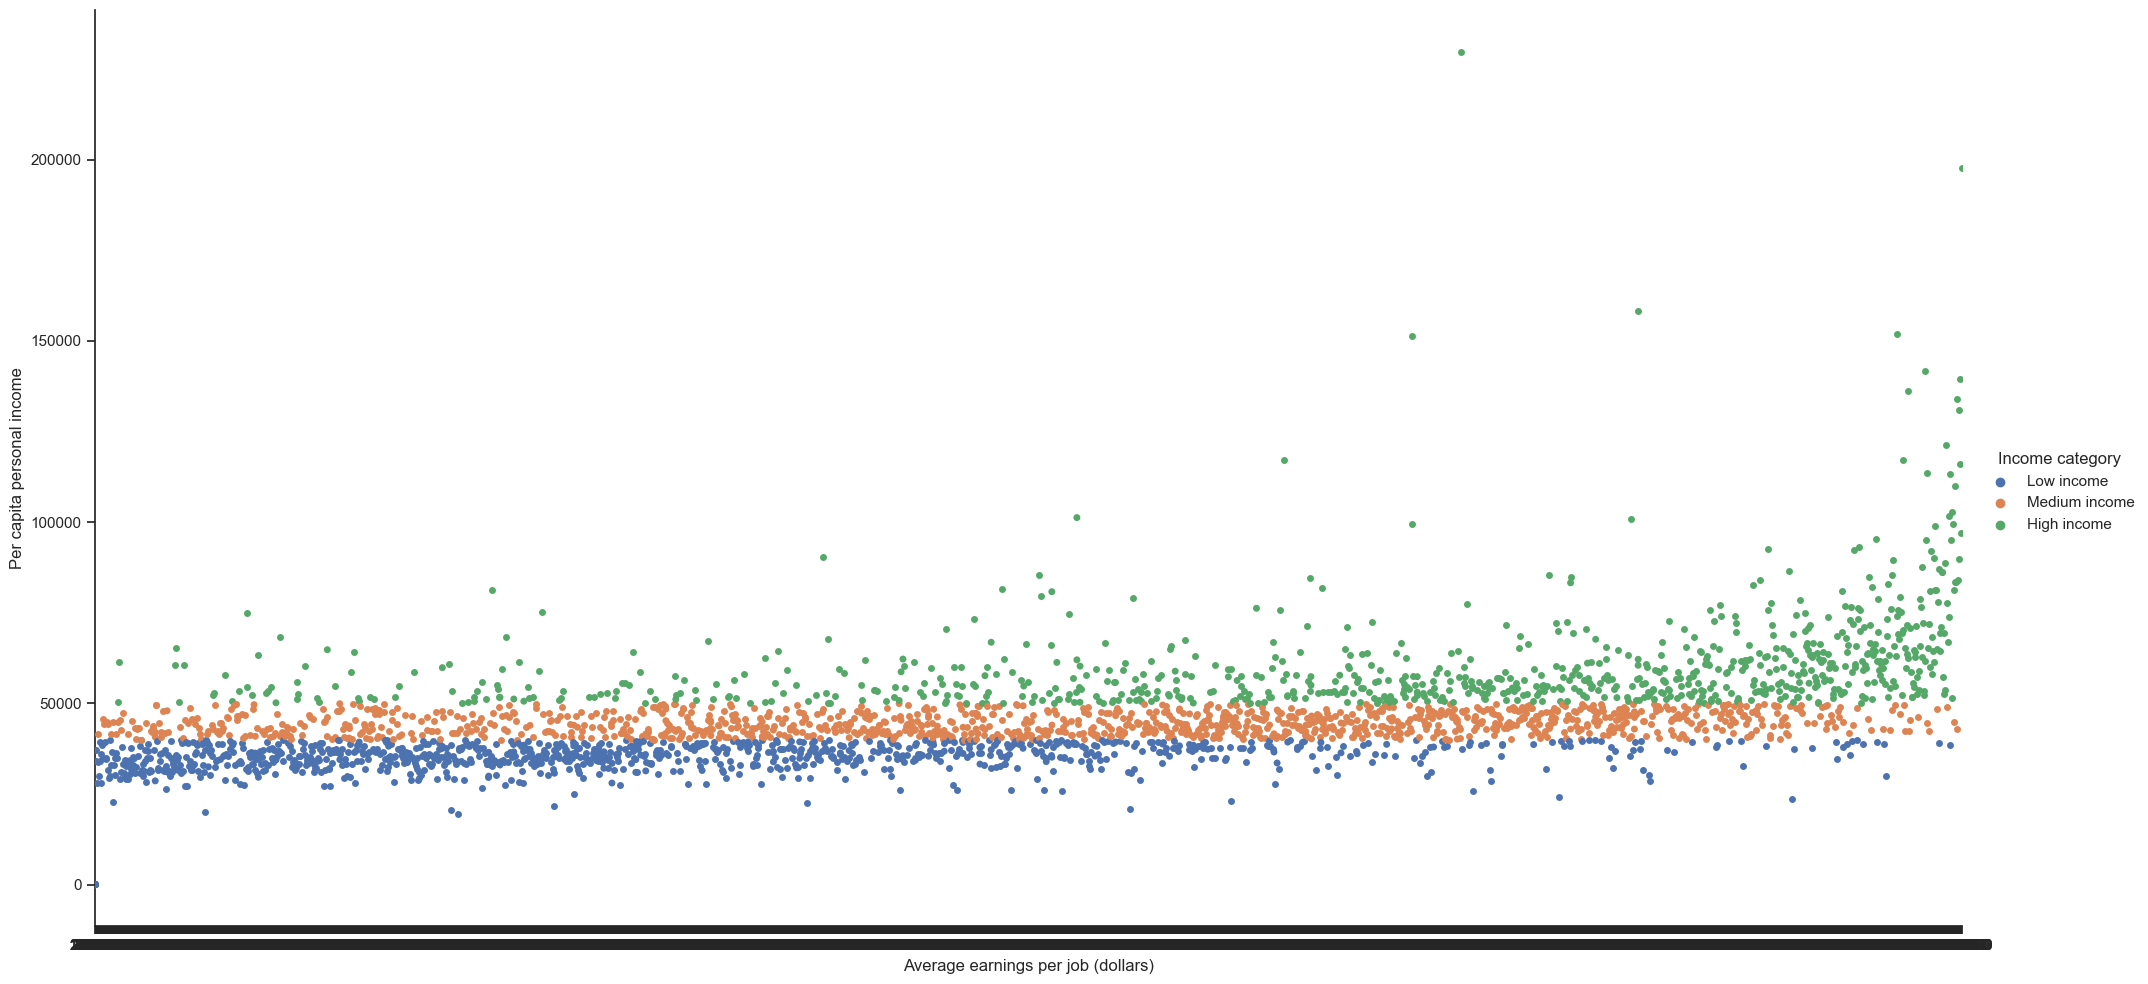

In [75]:
sns.set(style="ticks")
g = sns.catplot(x="Average earnings per job (dollars)", y="Per capita personal income", hue="Income category", data=df_sub,height=10, aspect=2)

### Interpretation of the Categorical plot between Per capita personal income and Average earnings per job \
It is very clear from the above plot that for higher income groups the Average earnings per job increase. Similarly a decrease in  Average earnings per job, leads to lower income groups. 

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. \
1.	What factors impact higher Total employment across counties? 
Funneling questions: 
a.	Is there any relationship between Total employment and Per capita income maintenance benefits or Per capita unemployment insurance compensation across different counties?
b.	Is there a relation between Total employment and Population?
#### 1. Factors which have been found to impact Total employment are :
       a. Net earnings by place of residence
       b. Earnings by place of work
       c. Population
No relation was found between Total employment and Per capita income maintenance benefits or Per capita unemployment insurance compensation across different counties. \
A positive linear relation can be seen between Total employment and Population. \

2.	What are the trends in Average earnings per job across different counties?
Funneling questions:
a.	Are there regions with higher job-based incomes?
#### 2. Average earnings per job tend to trend up with higher per capita personal income.
     a. As such the regions with higher Per capita personal incomes tend to have higher Average earnings per job. \
     
3. How is Per capita personal income distributed across different counties? Are there significant disparities between counties?
#### Per capita personal income has a moderate correlation with Average earnings per job. It also has a moderate negative relationship with per capita income maintainence benefits.
 This suggests that counties with lower per capita personal income end up paying higher unemployment benefits. \
 
4. How does population size correlate with other economic variables? 
a.	Are there notable differences in economic indicators based on population density?
#### Yes, the population has been found to have correlation with the following factors:
     a. Net earnings by place of residence
     b. Earnings by place of work
     c. Total employment
     Some of the outliers observed in the plots could be due to the variation in population densities of certain     
     counties. \
     
5. How have Per capita personal income changed over time within specific counties? 
Funneling questions:
a.	Are these counties experiencing consistent growth and fluctuations?
#### This question will be answered later during time series analysis..


### Define any hypotheses that you can at this point. You’ll be testing these later on.
####      If the Population of a county is high then the employment rate will be higher.

In [76]:
# DEBUGGING 

#df_eco_profile['GeoFIPS'] = df_eco_profile['GeoFIPS'].str.strip()

#condition = df_eco_profile['GeoFIPS'] == '01001'

# Create the subset DataFrame
#subset_df = df_eco_profile[condition]
#print('original DF')
#subset_df.head(33)

# 1. Pivot the DataFrame
#df_eco_profile_transposed = subset_df.pivot(index='GeoFIPS', columns='Description', values='2019').reset_index()

# Display the pivoted DataFrame to inspect the structure
#print("Pivoted DataFrame:")
#df_eco_profile_transposed.head(32)

# Rename the columns
#df_eco_profile_transposed.columns.name = None  # Remove the name of the columns index
#df_eco_profile_transposed.head(32)

# Print the first few rows of the transposed DataFrame to check if the data is correctly aligned
#print("\nTransposed DataFrame:")
#df_eco_profile_transposed.head(32)

# Rename the columns with your desired names
#df_eco_profile_transposed.columns = ['GeoFIPS', 'Personal income (thousands of dollars)', 'Net earnings by place of residence', 'Personal current transfer receipts', 'Income maintenance benefits', 'Unemployment insurance compensation', 'Retirement and other', 'Dividends, interest, and rent', 'Population (persons)', 'Per capita personal income', 'Per capita net earnings', 'Per capita personal current transfer receipts', 'Per capita income maintenance benefits', 'Per capita unemployment insurance compensation', 'Per capita retirement and other', 'Per capita dividends, interest, and rent', 'Earnings by place of work', 'Wages and salaries', 'Supplements to wages and salaries', 'Employer contributions for employee pension and insurance funds', 'Employer contributions for government social insurance', 'Proprietors\' income', 'Farm proprietors\' income',   'Nonfarm proprietors\' income', 'Total employment (number of jobs)', 'Wage and salary employment', 'Proprietors employment', 'Farm proprietors employment', 'Nonfarm proprietors employment', 'Average earnings per job (dollars)', 'Average wages and salaries', 'Average nonfarm proprietors\' income']

# Display the DataFrame after renaming columns
#print("\nDataFrame after renaming columns:")
#df_eco_profile_transposed.head(32)



# 1. Pivot the DataFrame
#df_eco_profile_transposed = subset_df.pivot(index='GeoFIPS', columns='Description', values='2019').reset_index()

# 2. Rename the columns
#df_eco_profile_transposed.columns.name = None  # Remove the name of the columns index
#df_eco_profile_transposed.columns = ['GeoFIPS', 'Personal income (thousands of dollars)', 'Net earnings by place of residence', 'Personal current transfer receipts', 'Income maintenance benefits', 'Unemployment insurance compensation', 'Retirement and other', 'Dividends, interest, and rent', 'Population (persons)', 'Per capita personal income', 'Per capita net earnings', 'Per capita personal current transfer receipts', 'Per capita income maintenance benefits', 'Per capita unemployment insurance compensation', 'Per capita retirement and other', 'Per capita dividends, interest, and rent', 'Earnings by place of work', 'Wages and salaries', 'Supplements to wages and salaries', 'Employer contributions for employee pension and insurance funds', 'Employer contributions for government social insurance', 'Proprietors\' income', 'Farm proprietors\' income',   'Nonfarm proprietors\' income', 'Total employment (number of jobs)', 'Wage and salary employment', 'Proprietors employment', 'Farm proprietors employment', 'Nonfarm proprietors employment', 'Average earnings per job (dollars)', 'Average wages and salaries', 'Average nonfarm proprietors\' income']
#print('transposed DF')
#df_eco_profile_transposed.head(5)